In [1]:
#import sys
#sys.path.append('/Users/huangxingyue/Desktop/NYU MFE/12 Capstone')
from Fitter.fitter import Fitter
from Fitter.over_specification import over_specification, get_check
from Fitter.collinearity import is_pos_def, check_collinearity

### The over-specification analysis is taking swaption data of 5Y tenor and 1Y expiry as an example.

### Hagan lognormal Implementation

In [2]:
# calibrate the Hagan SABR model to the input data with different equal constraints
fitter=Fitter('market_data.xlsx')

In [3]:
beta_check=get_check(fitter,[0],[0,0.3,0.5,0.7,1],method='Hagan_ln')
rho_check=get_check(fitter,[1],[0,-0.3,-0.5,-0.7,-0.9],method='Hagan_ln')
vega_check=get_check(fitter,[2],[0.2,0.4,0.6],method='Hagan_ln')

**Beta Testing**

The aim is this overspecification test is to quantify the calibration quality of the Hagan approximations, and how this would be influenced by the particular $\beta$ parameter. With $\beta$ fixed, we calibrate another three parameters: $\alpha$, $\rho$ and $\nu$. We have repeated the calibration using:

$\beta=0,$

$\beta=0.3,$

$\beta=0.5,$

$\beta=0.7,$

$\beta=1.$

From the plot below, it seems that the main effect of $\beta$ is a change in the smile slope, which tend to get more pronounced as $\beta$ moves from 1 to 0 (representing a switch from lognormal to normal).

Of these plotting lines, $\beta=0.3,0.5,0.7$ give similar good approximations while $\beta=0,1$ gives much steeper or smoother calibration.

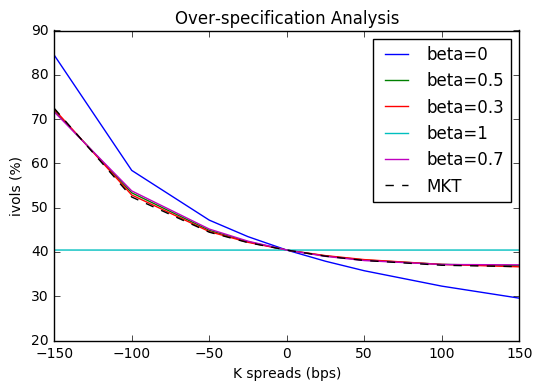

In [4]:
# conduct over-specification analysis on parameter beta
over_specification(fitter,beta_check,['beta'])

In [5]:
for fix_no in [0,0.3,0.5,0.7,1]: # print fitted params with beta fixed to specific nos
    results=fitter.calibration(eqc=[[0],[fix_no]])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007477, beta=0.000000, rho=-0.421673, nu=0.001000.

The model may suffer from strong collinearity as the condition no. is 14767.48, greater than 1000.

params fitted: alpha=0.024439, beta=0.300000, rho=0.163971, nu=0.393970.

The model may suffer from strong collinearity as the condition no. is 26375.98, greater than 1000.

params fitted: alpha=0.054274, beta=0.500000, rho=-0.071308, nu=0.443218.

The collinearity of the model is tolerable as the condition no. is 437.41, not greater than 1000.

params fitted: alpha=0.121060, beta=0.700000, rho=-0.257425, nu=0.505552.

The model may suffer from strong collinearity as the condition no. is 2948.06, greater than 1000.

params fitted: alpha=0.406929, beta=1.000000, rho=-0.456539, nu=0.622854.

The collinearity of the model is tolerable as the condition no. is 178.40, not greater than 1000.


**Rho Testing**

Same calibration process is applied to $\rho$ using:

$\rho=0,$

$\rho=-0.3,$

$\rho=-0.5,$

$\rho=-0.7,$

$\rho=-0.9.$

According to the plot below, the smile curve is relatively steeper when rho comes closer to -1. And the effects of $\rho$ and of $\beta$ are similar，both are on the smile slope. And most rho values give good approximations except $\rho=-0.7$ and $\rho=-0.9$, which are steeper than market ivol smile and don't fit well to out of the money options.

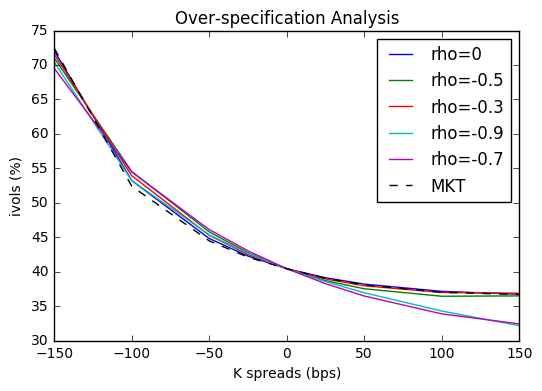

In [6]:
# conduct over-specification analysis on parameter rho
over_specification(fitter, rho_check,['rho'])

In [7]:
for fix_no in [0,-0.3,-0.5,-0.7,-0.9]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[[1],[fix_no]])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.041107, beta=0.430409, rho=0.000000, nu=0.422162.

The model may suffer from strong collinearity as the condition no. is 4843.38, greater than 1000.

params fitted: alpha=0.139220, beta=0.734434, rho=-0.300000, nu=0.511657.

The collinearity of the model is tolerable as the condition no. is 877.76, not greater than 1000.

params fitted: alpha=0.409043, beta=1.000000, rho=-0.500000, nu=0.607551.

The collinearity of the model is tolerable as the condition no. is 78.84, not greater than 1000.

params fitted: alpha=0.417598, beta=1.000000, rho=-0.700000, nu=0.521064.

The collinearity of the model is tolerable as the condition no. is 60.38, not greater than 1000.

params fitted: alpha=0.021088, beta=0.259540, rho=-0.900000, nu=0.001000.

The collinearity of the model is tolerable as the condition no. is 68.59, not greater than 1000.


**Nu Testing**

Same calibration process is applied to $\nu$ using:

$\nu=0.2,$

$\nu=0.4,$

$\nu=0.6$

As can be seen from the plot below, vega has an effect on the curvature of the smile curve: higher vega leads to higher ivols for in-the-money and out-of-the-money options.

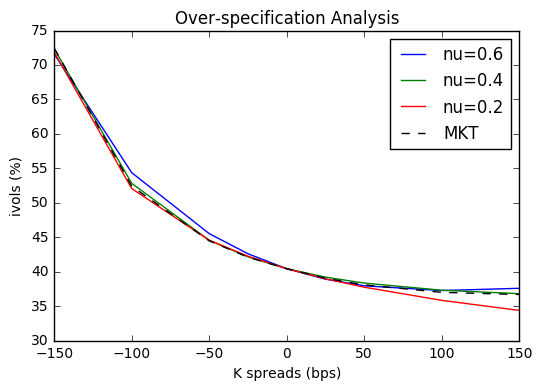

In [8]:
# conduct over-specification analysis on parameter vega
over_specification(fitter, vega_check,['nu'])

In [9]:
for fix_no in [0.2,0.4,0.6]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[[2],[fix_no]])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007478, beta=0.000000, rho=0.835128, nu=0.200000.

The model may suffer from strong collinearity as the condition no. is 3949.52, greater than 1000.

params fitted: alpha=0.023062, beta=0.285576, rho=0.187677, nu=0.400000.

The model may suffer from strong collinearity as the condition no. is 25968.86, greater than 1000.

params fitted: alpha=0.295697, beta=0.921609, rho=-0.401984, nu=0.600000.

The model may suffer from strong collinearity as the condition no. is 9704.06, greater than 1000.


**Beta and Rho Testing**

Same calibration process is applied to $\beta$ and $\rho$ using:

$\beta=0,\rho=0$

$\beta=0,\rho=0.8$

$\beta=0,\rho=-0.8$

$\beta=0.3,\rho=0$

$\beta=0.3,\rho=0.8$

$\beta=0.3,\rho=-0.8$

$\beta=0,\rho=0.8$ gives best approximation while $\beta=0,\rho=-0.8$ gives the worst for out of money options.

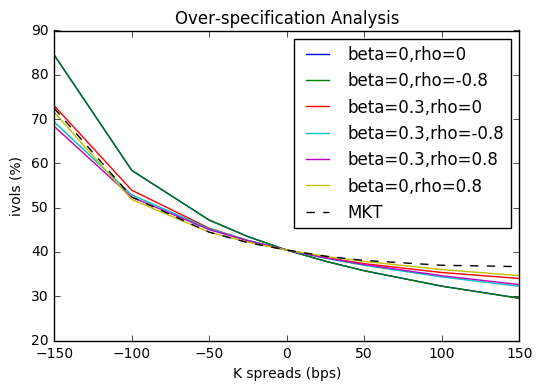

In [10]:
beta_rho_check=get_check(fitter,[0,1],[[0,0],[0,0.8],[0,-0.8],[0.3,0],[0.3,0.8],[0.3,-0.8]],method='Hagan_ln')
over_specification(fitter,beta_rho_check,['beta','rho'])

In [11]:
for fix_no in [[0,0],[0,0.8],[0,-0.8],[0.3,0],[0.3,0.8],[0.3,-0.8]]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[[0,1],fix_no])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007477, beta=0.000000, rho=0.000000, nu=0.001000.

The model may suffer from strong collinearity as the condition no. is 965457.66, greater than 1000.

params fitted: alpha=0.007476, beta=0.000000, rho=0.800000, nu=0.218824.

The collinearity of the model is tolerable as the condition no. is 71.54, not greater than 1000.

params fitted: alpha=0.007477, beta=0.000000, rho=-0.800000, nu=0.001000.

The model may suffer from strong collinearity as the condition no. is 4906.06, greater than 1000.

params fitted: alpha=0.024613, beta=0.300000, rho=0.000000, nu=0.291104.

The model may suffer from strong collinearity as the condition no. is 92473.64, greater than 1000.

params fitted: alpha=0.024785, beta=0.300000, rho=0.800000, nu=0.001000.

The collinearity of the model is tolerable as the condition no. is 49.75, not greater than 1000.

params fitted: alpha=0.024795, beta=0.300000, rho=-0.800000, nu=0.015654.

The collinearity of the model is tolerable as the conditi

**Beta and Nu Testing**

Same calibration process is applied to $\beta$ and $\nu$ using:

$\beta=0,\nu=0.25$

$\beta=0.3,\nu=0.25$

$\beta=0.5,\nu=0.25$

$\beta=0.7,\nu=0.25$

$\beta=1,\nu=0.25$

When $\nu=0.25$, lower beta gives better approximation.

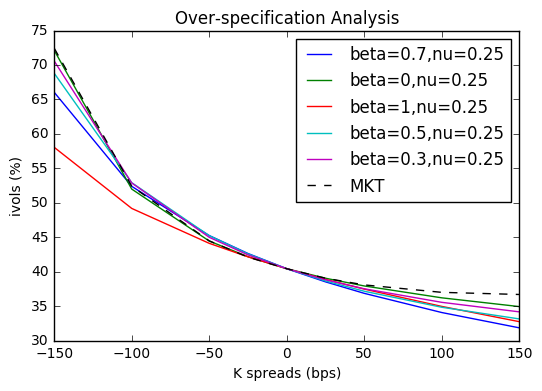

In [12]:
beta_nu_check=get_check(fitter,[0,2],[[0,0.25],[0.3,0.25],[0.5,0.25],[0.7,0.25],[1,0.25]],method='Hagan_ln')
over_specification(fitter,beta_nu_check,['beta','nu'])

In [13]:
for fix_no in [[0,0.25],[0.3,0.25],[0.5,0.25],[0.7,0.25],[1,0.25]]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[[0,2],fix_no])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007468, beta=0.000000, rho=0.714711, nu=0.250000.

The model may suffer from strong collinearity as the condition no. is 1086.75, greater than 1000.

params fitted: alpha=0.024646, beta=0.300000, rho=0.074588, nu=0.250000.

The model may suffer from strong collinearity as the condition no. is 1121.47, greater than 1000.

params fitted: alpha=0.055078, beta=0.500000, rho=-0.352987, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 260.04, not greater than 1000.

params fitted: alpha=0.123829, beta=0.700000, rho=-0.748135, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 222.12, not greater than 1000.

params fitted: alpha=0.416087, beta=1.000000, rho=-0.999000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 182.77, not greater than 1000.


**Rho and Nu Testing**

Same calibration process is applied to $\rho$ and $\nu$ using:

$\rho=0,\nu=0.25$

$\rho=0.8,\nu=0.25$

$\rho=-0.8,\nu=0.25$

Since a more negative $\rho$ of -0.8 indicates a steeper smile curve, it does not fit well to a smooth ivol smile of curvature. $\rho=0.8$ fits best for out of the money options while $\rho=0$ is best for in the money options.

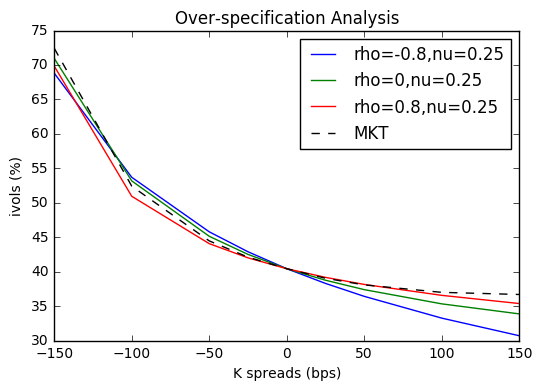

In [14]:
rho_nu_check=get_check(fitter,[1,2],[[0,0.25],[0.8,0.25],[-0.8,0.25]],method='Hagan_ln')
over_specification(fitter,rho_nu_check,['rho','nu'])

In [16]:
for fix_no in [[0,0.25],[0.8,0.25],[-0.8,0.25]]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[[1,2],fix_no])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.026731, beta=0.320219, rho=0.000000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 667.64, not greater than 1000.

params fitted: alpha=0.007476, beta=0.000000, rho=0.800000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 29.46, not greater than 1000.

params fitted: alpha=0.098634, beta=0.642857, rho=-0.800000, nu=0.250000.

The model may suffer from strong collinearity as the condition no. is 1493.24, greater than 1000.


### Obloj Implementation 

In [6]:
# calibrate the Obloj SABR model to the input data with different equal constraints
beta_check=get_check(fitter,[0],[0,0.3,0.5,0.7,1],method='Obloj')
rho_check=get_check(fitter,[1],[0,-0.3,-0.5,-0.7,-0.9],method='Obloj')
vega_check=get_check(fitter,[2],[0.2,0.4,0.6],method='Obloj')

/Users/huangxingyue/Desktop/NYU MFE/12 Capstone/Pricing/SABR.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  sigma=nu*logFK/math.log((math.sqrt(1-2*rho*z+z*z)+z-rho)/(1-rho))
/Users/huangxingyue/Desktop/NYU MFE/12 Capstone/Pricing/SABR.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  z=nu*(math.pow(F,(1-beta))-math.pow(K,(1-beta)))/alpha/(1-beta)
/Users/huangxingyue/Desktop/NYU MFE/12 Capstone/Pricing/SABR.py:77: RuntimeWarning: invalid value encountered in double_scalars
  sigma=nu*logFK/math.log((math.sqrt(1-2*rho*z+z*z)+z-rho)/(1-rho))


**Beta Testing**

All beta values except $\beta=1$ give fantastic approximation, which indicates a collinearity problem with Obloj implementation.

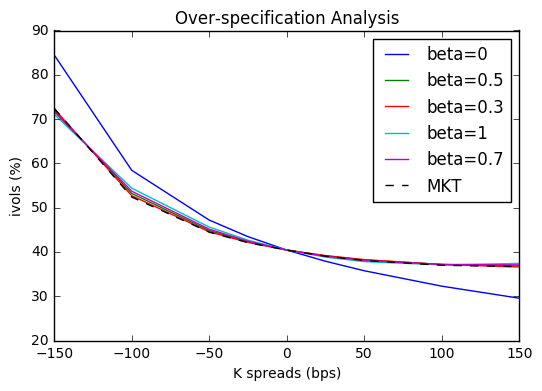

In [7]:
over_specification(fitter,beta_check,['beta'])

In [8]:
for fix_no in [0,0.3,0.5,0.7,1]: # print fitted params with beta fixed to specific nos
    results=fitter.calibration(method='Obloj',eqc=[[0],[fix_no]])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007477, beta=0.000000, rho=-0.419368, nu=0.001000.

The model may suffer from strong collinearity as the condition no. is 55292.74, greater than 1000.

params fitted: alpha=0.024454, beta=0.300000, rho=0.171786, nu=0.383871.

The model may suffer from strong collinearity as the condition no. is 59085.35, greater than 1000.

params fitted: alpha=0.054300, beta=0.500000, rho=-0.067992, nu=0.435100.

The model may suffer from strong collinearity as the condition no. is 4000.88, greater than 1000.

params fitted: alpha=0.121083, beta=0.700000, rho=-0.256862, nu=0.501776.

The model may suffer from strong collinearity as the condition no. is 1496.45, greater than 1000.

params fitted: alpha=0.406929, beta=1.000000, rho=-0.456543, nu=0.622855.

The collinearity of the model is tolerable as the condition no. is 134.08, not greater than 1000.


** Rho Testing **

Rho testing for Obloj implementation is similar to that of Hagan implementation.

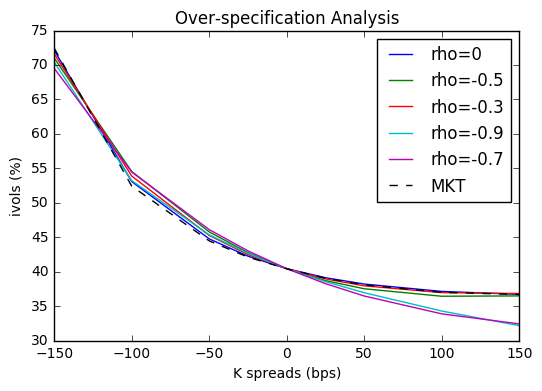

In [9]:
over_specification(fitter,rho_check,['rho'])

In [10]:
for fix_no in [0,-0.3,-0.5,-0.7,-0.9]: # print fitted params with different equal constraints
    results=fitter.calibration(method='Obloj', eqc=[[1],[fix_no]])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.041934, beta=0.435267, rho=0.000000, nu=0.414536.

The model may suffer from strong collinearity as the condition no. is 1248.40, greater than 1000.

params fitted: alpha=0.138420, beta=0.732940, rho=-0.300000, nu=0.507447.

The collinearity of the model is tolerable as the condition no. is 18.75, not greater than 1000.

params fitted: alpha=0.409043, beta=1.000000, rho=-0.500000, nu=0.607499.

The model may suffer from strong collinearity as the condition no. is 61449885940.26, greater than 1000.

params fitted: alpha=0.417568, beta=0.999983, rho=-0.700000, nu=0.521052.

LinAlgError: failure to calculate condition number.

params fitted: alpha=0.021118, beta=0.259889, rho=-0.900000, nu=0.001000.

The collinearity of the model is tolerable as the condition no. is 8.80, not greater than 1000.


** Nu Testing **

Nu testing for Obloj implementation has similar result as that for Hagan implementation

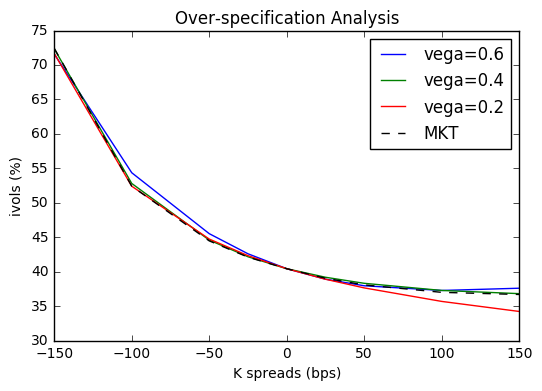

In [11]:
over_specification(fitter,vega_check,['vega'])

In [12]:
for fix_no in [0.2,0.4,0.6]: # print fitted params with different equal constraints
    results=fitter.calibration(method='Obloj',eqc=[[2],[fix_no]])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007475, beta=0.000000, rho=0.784091, nu=0.200000.

The model may suffer from strong collinearity as the condition no. is 71706836723.04, greater than 1000.

params fitted: alpha=0.028755, beta=0.340834, rho=0.124339, nu=0.400000.

The model may suffer from strong collinearity as the condition no. is 2140.27, greater than 1000.

params fitted: alpha=0.295471, beta=0.921436, rho=-0.401227, nu=0.600000.

The model may suffer from strong collinearity as the condition no. is 71023203.32, greater than 1000.


**Beta and Rho Testing**

Same calibration process is applied to $\beta$ and $\rho$ using:

$\beta=0,\rho=0$

$\beta=0,\rho=0.8$

$\beta=0,\rho=-0.8$

$\beta=0.3,\rho=0$

$\beta=0.3,\rho=0.8$

$\beta=0.3,\rho=-0.8$

$\beta=0,\rho=0.8$ gives best approximation while $\beta=0,\rho=-0.8$ gives the worst for out of money options.

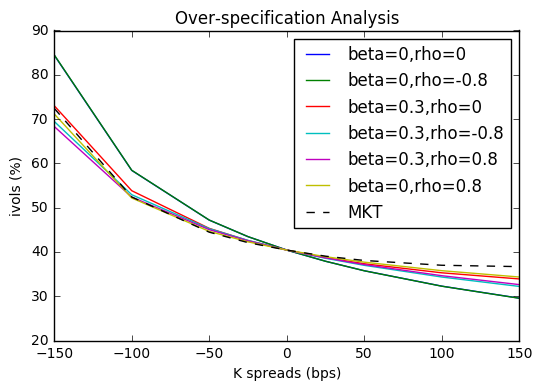

In [13]:
beta_rho_check=get_check(fitter,[0,1],[[0,0],[0,0.8],[0,-0.8],[0.3,0],[0.3,0.8],[0.3,-0.8]],method='Obloj')
over_specification(fitter,beta_rho_check,['beta','rho'])

In [14]:
for fix_no in [[0,0],[0,0.8],[0,-0.8],[0.3,0],[0.3,0.8],[0.3,-0.8]]: # print fitted params with different equal constraints
    results=fitter.calibration(method='Obloj',eqc=[[0,1],fix_no])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007477, beta=0.000000, rho=0.000000, nu=0.001132.

The model may suffer from strong collinearity as the condition no. is 887814.92, greater than 1000.

params fitted: alpha=0.007476, beta=0.000000, rho=0.800000, nu=0.202160.

The collinearity of the model is tolerable as the condition no. is 39.59, not greater than 1000.

params fitted: alpha=0.007477, beta=0.000000, rho=-0.800000, nu=0.001000.

The model may suffer from strong collinearity as the condition no. is 5649.23, greater than 1000.

params fitted: alpha=0.024630, beta=0.300000, rho=0.000000, nu=0.276794.

The model may suffer from strong collinearity as the condition no. is 140751.73, greater than 1000.

params fitted: alpha=0.024785, beta=0.300000, rho=0.800000, nu=0.001000.

The collinearity of the model is tolerable as the condition no. is 71.23, not greater than 1000.

params fitted: alpha=0.024795, beta=0.300000, rho=-0.800000, nu=0.016534.

The collinearity of the model is tolerable as the condit

**Beta and Nu Testing**

Same calibration process is applied to $\beta$ and $\nu$ using:

$\beta=0,\nu=0.25$

$\beta=0.3,\nu=0.25$

$\beta=0.5,\nu=0.25$

$\beta=0.7,\nu=0.25$

$\beta=1,\nu=0.25$

When $\nu=0.25$, lower beta gives better approximation.

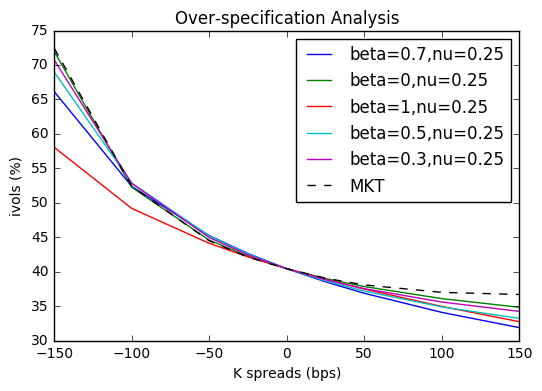

In [25]:
beta_nu_check=get_check(fitter,[0,2],[[0,0.25],[0.3,0.25],[0.5,0.25],[0.7,0.25],[1,0.25]],method='Obloj')
over_specification(fitter,beta_nu_check,['beta','nu'])

In [15]:
for fix_no in [[0,0.25],[0.3,0.25],[0.5,0.25],[0.7,0.25],[1,0.25]]: # print fitted params with different equal constraints
    results=fitter.calibration(method='Obloj',eqc=[[0,2],fix_no])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.007466, beta=0.000000, rho=0.681119, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 877.85, not greater than 1000.

params fitted: alpha=0.024645, beta=0.300000, rho=0.082503, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 928.62, not greater than 1000.

params fitted: alpha=0.055069, beta=0.500000, rho=-0.343687, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 190.61, not greater than 1000.

params fitted: alpha=0.123815, beta=0.700000, rho=-0.744256, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 367.55, not greater than 1000.

params fitted: alpha=0.416087, beta=1.000000, rho=-0.999000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 21.38, not greater than 1000.


**Rho and Nu Testing**

Same calibration process is applied to $\rho$ and $\nu$ using:

$\rho=0,\nu=0.25$

$\rho=0.8,\nu=0.25$

$\rho=-0.8,\nu=0.25$

Since a more negative $\rho$ of -0.8 indicates a steeper smile curve, it does not fit well to a smooth ivol smile of curvature. $\rho=0.8$ fits best for out of the money options while $\rho=0$ is best for in the money options.

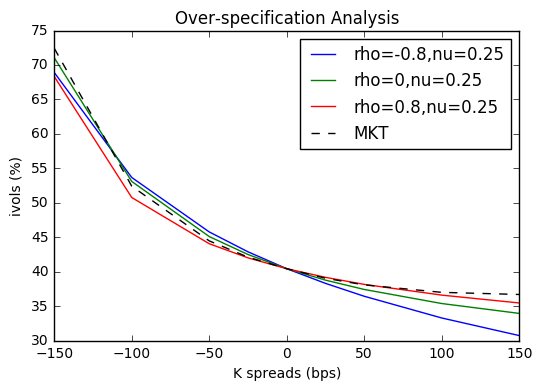

In [16]:
rho_nu_check=get_check(fitter,[1,2],[[0,0.25],[0.8,0.25],[-0.8,0.25]],method='Obloj')
over_specification(fitter,rho_nu_check,['rho','nu'])

In [17]:
for fix_no in [[0,0.25],[0.8,0.25],[-0.8,0.25]]: # print fitted params with different equal constraints
    results=fitter.calibration(method='Obloj',eqc=[[1,2],fix_no])
    print ('\nparams fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))
    check_collinearity(results['jacmat'])


params fitted: alpha=0.027338, beta=0.325842, rho=0.000000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 34.36, not greater than 1000.

params fitted: alpha=0.007476, beta=0.000000, rho=0.800000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 21.75, not greater than 1000.

params fitted: alpha=0.099792, beta=0.645769, rho=-0.800000, nu=0.250000.

The collinearity of the model is tolerable as the condition no. is 88.89, not greater than 1000.
